# Prerequisites
- Python 3
- Python jupyter module
- Python clearml module
- [Cuda 12.3](https://developer.nvidia.com/cuda-downloads)

# Create a ~/clearml.conf file with these settings:
```
api {
    # web_server on port 8080
    web_server: "http://clearml.ad.ai.sdl.com:8080"

    # Notice: 'api_server' is the api server (default port 8008), not the web server.
    api_server: "http://clearml.ad.ai.sdl.com:8008"

    # file server on port 8081
    files_server: "http://clearml.ad.ai.sdl.com:8081"

    # Credentials are generated using the webapp, http://clearml.ad.ai.sdl.com:8080/profile
    credentials {"access_key": "REPLACE WITH YOURS", "secret_key": "REPLACE WITH YOURS"}

}

aws {
    s3 {
        # S3 credentials, used for read/write access by various SDK elements

        # default, used for any bucket not specified below
        key: ""
        secret: ""
        region: ""
        use_credentials_chain: false
        extra_args: {}

        credentials: [
            # specifies key/secret credentials to use when handling s3 urls (read or write)
            {
                bucket: "my-bucket-name"
                key: ""
                secret: ""
                verify: "/path/to/ca/bundle.crt" OR false to not verify
                use_credentials_chain: false
            },

        ]
    }
    boto3 {
        pool_connections: 512
        max_multipart_concurrency: 16
    }
}
```

# Create dataset

In [1]:
from clearml import Dataset
dataset = Dataset.create(
  dataset_name='kaggle_sarcasm',
  dataset_project='sarcasm_detector',
  dataset_version="1.0",
  description='From https://www.kaggle.com/datasets/danofer/sarcasm'
)

ClearML results page: http://clearml.ad.ai.sdl.com:8080/projects/bb6dcbb1fa1947419bff890afeef26fb/experiments/0a72e0a0fa45487ebfca65218cbed087/output/log
ClearML dataset page: http://clearml.ad.ai.sdl.com:8080/datasets/simple/bb6dcbb1fa1947419bff890afeef26fb/experiments/0a72e0a0fa45487ebfca65218cbed087


# Upload files

In [2]:
dataset.add_files("data")
dataset.upload()
dataset.finalize()

Generating SHA2 hash for 2 files


100%|██████████| 2/2 [00:00<00:00,  5.93it/s]


Hash generation completed
Uploading dataset changes (2 files compressed to 28.69 MiB) to http://clearml.ad.ai.sdl.com:8081
File compression and upload completed: total size 28.69 MiB, 1 chunk(s) stored (average size 28.69 MiB)


True

# Start sklearn training

ClearML Task: created new task id=14771e8a43414bf4816f28749b13ab57
ClearML results page: http://clearml.ad.ai.sdl.com:8080/projects/4bb81883b30e45cfbbe3d9e7bf25a014/experiments/14771e8a43414bf4816f28749b13ab57/output/log


Using custom data configuration default-b946c765e8b76d6e


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

C:\Users\Andrew\PycharmProjects\sarcasm_detector\venv\Lib\site-packages\datasets\download\streaming_download_manager.py:727: FutureWarning:

the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'

C:\Users\Andrew\PycharmProjects\sarcasm_detector\venv\Lib\site-packages\datasets\download\streaming_download_manager.py:727: FutureWarning:

the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'



Dataset csv downloaded and prepared to C:/Users/Andrew/.cache/huggingface/datasets/csv/default-b946c765e8b76d6e/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/203 [00:00<?, ?ba/s]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    2.0s finished


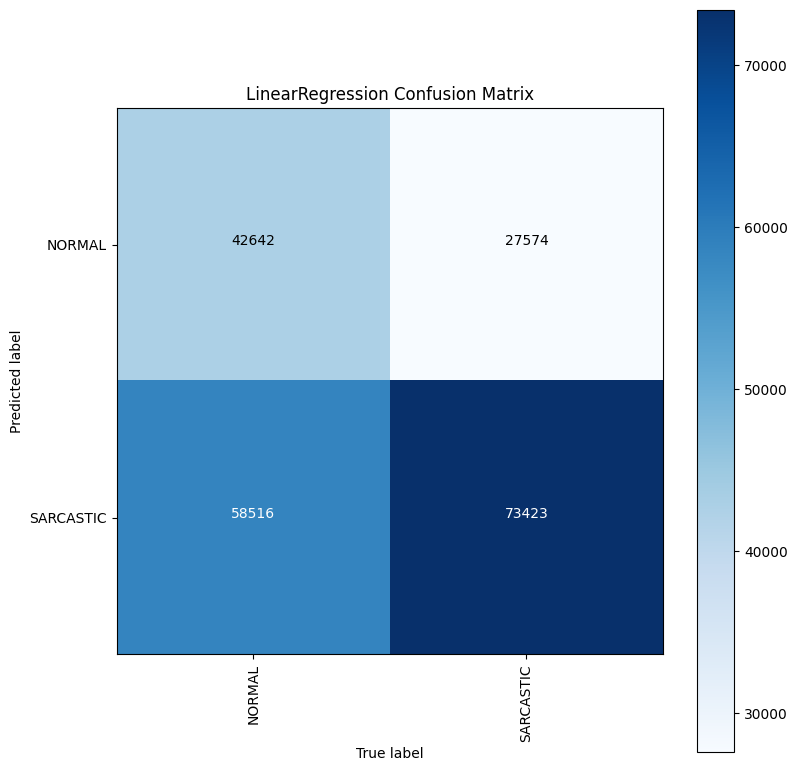

In [3]:
from train.train_sklearn import SklearnTrainer

sarcasm_sk_trainer = SklearnTrainer(subset_size=1000)
sarcasm_sk_trainer.train()
sarcasm_sk_trainer.task.close()

# Check pytorch versions
If requirements.txt isn't installing torch with cuda, try running this, however, the pytorch repo connection is unstable:
%python -m pip uninstall torch torchvision torchaudio
%python -m pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [4]:
import torch

print(f'PyTorch version: {torch.__version__}')
print('*'*10)
print(f'_CUDA version: ')
!nvcc --version
print('*'*10)
print(f'CUDNN version: {torch.backends.cudnn.version()}')
print(f'Available GPU devices: {torch.cuda.device_count()}')
print(f'Device Name: {torch.cuda.get_device_name()}')

PyTorch version: 2.1.0+cu121
**********
_CUDA version: 
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Fri_Sep__8_19:56:38_Pacific_Daylight_Time_2023
Cuda compilation tools, release 12.3, V12.3.52
Build cuda_12.3.r12.3/compiler.33281558_0
**********
CUDNN version: 8801
Available GPU devices: 1
Device Name: NVIDIA GeForce RTX 3060 Ti


# Train transformer

ClearML Task: created new task id=69b852d11efe4b44a399d74de8874cf4
ClearML results page: http://clearml.ad.ai.sdl.com:8080/projects/4bb81883b30e45cfbbe3d9e7bf25a014/experiments/69b852d11efe4b44a399d74de8874cf4/output/log


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using custom data configuration default-b946c765e8b76d6e
Found cached dataset csv (C:/Users/Andrew/.cache/huggingface/datasets/csv/default-b946c765e8b76d6e/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)
Loading cached split indices for dataset at C:\Users\Andrew\.cache\huggingface\datasets\csv\default-b946c765e8b76d6e\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-496851b6cc00a9da.arrow and C:\Users\Andrew\.cache\huggingface\datasets\csv\default-b946c765e8b76d6e\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-c3fdf565d91b787e.arrow
Loading cached processed 

Training with params: TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=IntervalStrategy.EPOCH,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=False,
group_by_length=False,
half_precision_back

Unsupported key of type '<class 'int'>' found when connecting dictionary. It will be converted to str
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss


ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start
ClearML Monitor: Reporting detected, reverting back to iteration based reporting


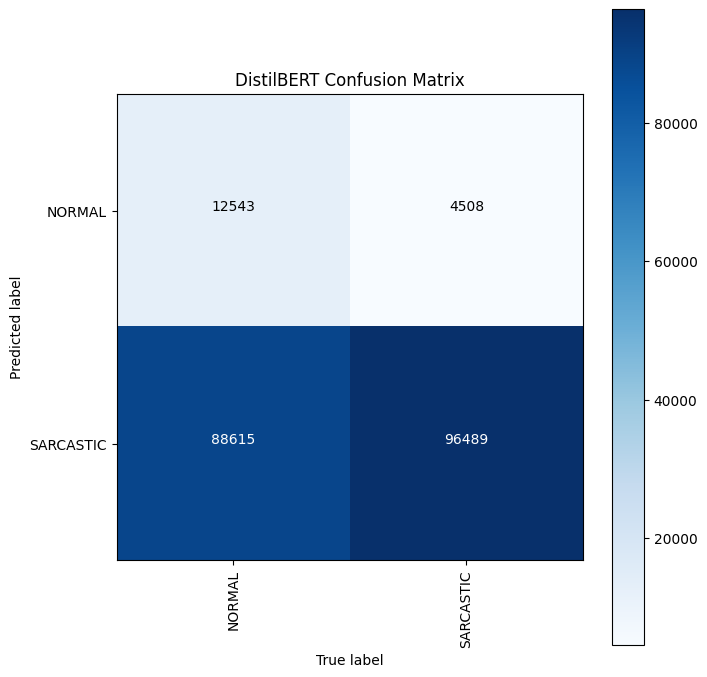

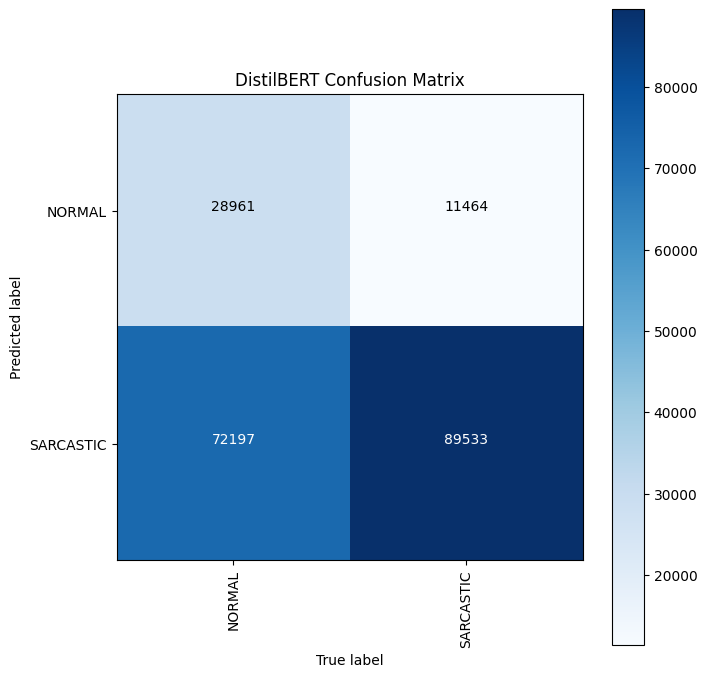

In [6]:
from train.train_transformer import SarcasmTrainer

sarcasm_tfr_trainer = SarcasmTrainer(subset_size=1000)
sarcasm_tfr_trainer.train()
sarcasm_tfr_trainer.task.close()

# Start gradio evaluation server

In [1]:
from deploy.gradio_product import GradioApp
gradio = GradioApp(transformer_model_id="6a8a0fdf41c240e4a95562c9a097a766", sklearn_model_id="0a934e7786f94ad79d201fbc3306b802")
gradio.demo()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# Retrain sklearn with new labeled samples

ClearML Task: created new task id=218399565943475e97f2605f227532a0
ClearML results page: http://clearml.ad.ai.sdl.com:8080/projects/4bb81883b30e45cfbbe3d9e7bf25a014/experiments/218399565943475e97f2605f227532a0/output/log


Using custom data configuration default-49f2d8d3fabbe2ba


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

C:\Users\Andrew\PycharmProjects\sarcasm_detector\venv\Lib\site-packages\datasets\download\streaming_download_manager.py:727: FutureWarning:

the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'

C:\Users\Andrew\PycharmProjects\sarcasm_detector\venv\Lib\site-packages\datasets\download\streaming_download_manager.py:727: FutureWarning:

the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'

C:\Users\Andrew\PycharmProjects\sarcasm_detector\venv\Lib\site-packages\datasets\download\streaming_download_manager.py:727: FutureWarning:

the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'

C:\Users\Andrew\PycharmProjects\sarcasm_detector\venv\Lib\site-packages\datasets\download\streaming_download_manager.py:727: FutureWarning:

the 'ma

Dataset csv downloaded and prepared to C:/Users/Andrew/.cache/huggingface/datasets/csv/default-49f2d8d3fabbe2ba/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/203 [00:00<?, ?ba/s]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    5.5s finished


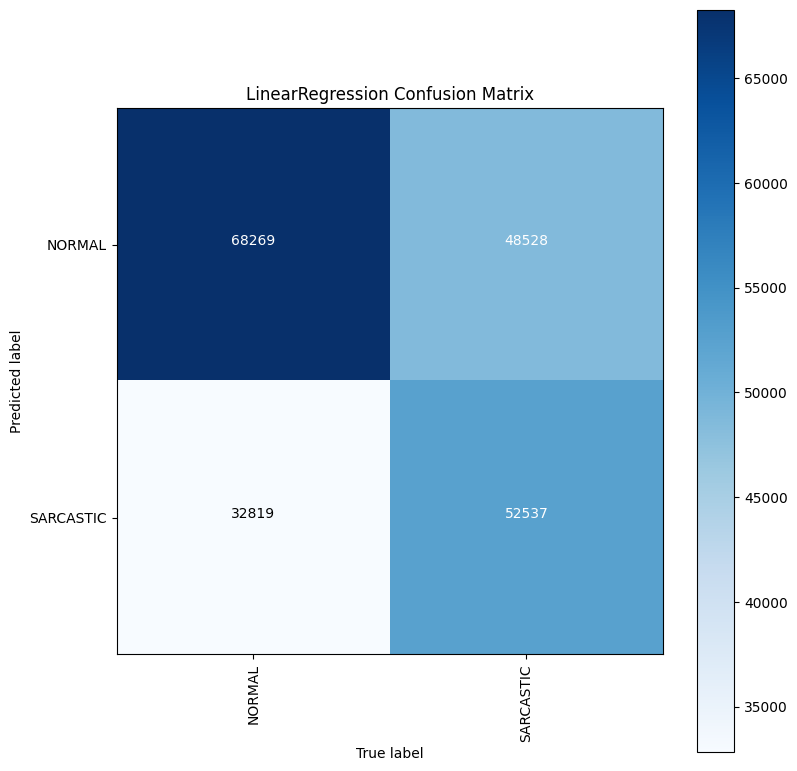

In [10]:
from train.train_sklearn import SklearnTrainer

sarcasm_sk_trainer = SklearnTrainer(subset_size=1000)
sarcasm_sk_trainer.train()
sarcasm_sk_trainer.task.close()

# Retrain transformer with new labeled data

ClearML Task: created new task id=0608e3b24bbd49a7af6f34b8e47087f1
ClearML results page: http://clearml.ad.ai.sdl.com:8080/projects/4bb81883b30e45cfbbe3d9e7bf25a014/experiments/0608e3b24bbd49a7af6f34b8e47087f1/output/log


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using custom data configuration default-49f2d8d3fabbe2ba
Found cached dataset csv (C:/Users/Andrew/.cache/huggingface/datasets/csv/default-49f2d8d3fabbe2ba/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)
Loading cached split indices for dataset at C:\Users\Andrew\.cache\huggingface\datasets\csv\default-49f2d8d3fabbe2ba\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-26fabec3f4c1473a.arrow and C:\Users\Andrew\.cache\huggingface\datasets\csv\default-49f2d8d3fabbe2ba\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-f8c5b147ef26195a.arrow


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/203 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/203 [00:00<?, ?ba/s]

C:\Users\Andrew\PycharmProjects\sarcasm_detector\venv\Lib\site-packages\transformers\training_args.py:1711: FutureWarning:

`--push_to_hub_token` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_token` instead.



Training with params: TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=IntervalStrategy.EPOCH,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=False,
group_by_length=False,
half_precision_back

Unsupported key of type '<class 'int'>' found when connecting dictionary. It will be converted to str
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss


ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start
ClearML Monitor: Reporting detected, reverting back to iteration based reporting


Retrying (Retry(total=237, connect=237, read=240, redirect=240, status=240)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000236359EBD90>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')': /v2.23/tasks.get_all
Retrying (Retry(total=236, connect=236, read=240, redirect=240, status=240)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000236359EB650>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')': /v2.23/tasks.get_all
Retrying (Retry(total=237, connect=237, read=240, redirect=240, status=240)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000236362BF050>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine activel

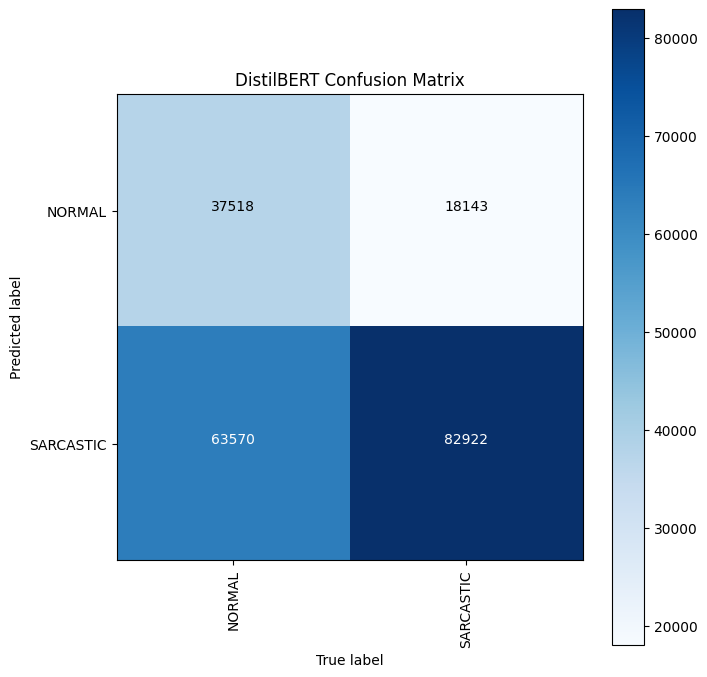

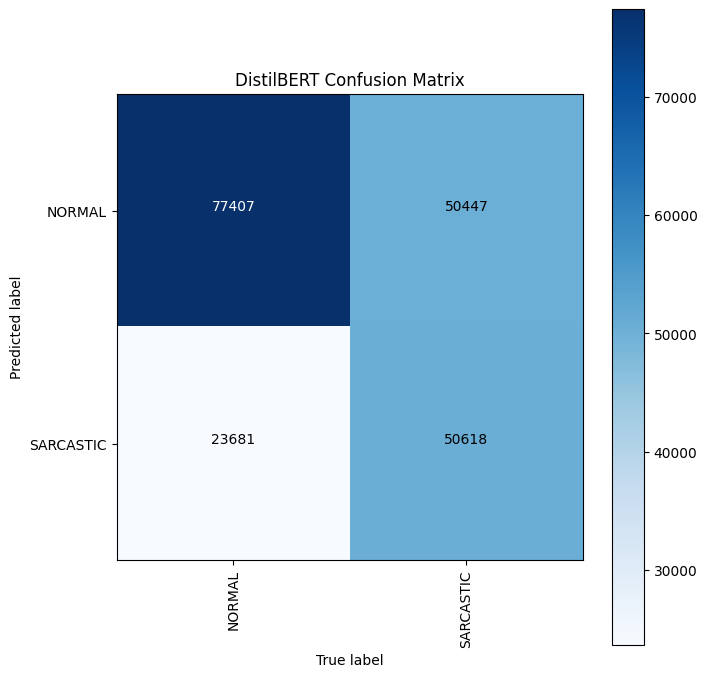

In [11]:
from train.train_transformer import SarcasmTrainer

sarcasm_tfr_trainer = SarcasmTrainer(subset_size=1000)
sarcasm_tfr_trainer.train()
sarcasm_tfr_trainer.task.close()